In [9]:
import warnings
warnings.filterwarnings('ignore')
import os
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
tsp = pd.read_csv("../datasets/tsp.csv")
data = tsp.values[:, 1:]
tsp.head()

,1,565,575
0,2,25,185
1,3,345,750
2,4,945,685
3,5,845,655
4,6,880,660


39510

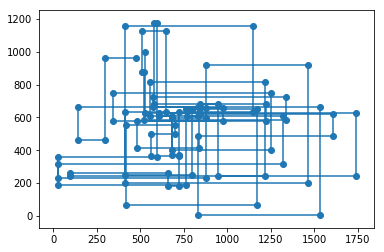

In [17]:
def plot_path(X):
    ps = []
    for x in X:
        if len(ps) == 0:
            ps.append(x)
        if ps[-1][0] != x[0] and ps[-1][1] != x[1]:
            ps.append(np.array([ps[-1][0], x[1]]))
            ps.append(x)
    ps = np.array(ps)
    plt.plot(ps[:, 0], ps[:, 1])
    plt.scatter(ps[:, 0], ps[:, 1])
    
def path_len(X):
    return np.sum(np.abs(X[1:, 0] - X[:-1, 0])) + np.sum(np.abs(X[1:, 1] - X[:-1, 1]))
    
plot_path(data)
path_len(data)

26790


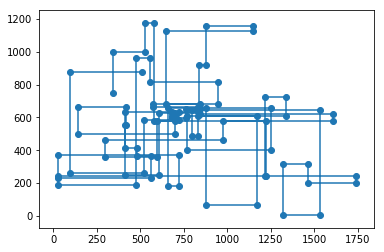

In [62]:
def monte_carlo(X, n_iter=100000):
    shortes_len = path_len(X)
    best_path = None
    for i in range(n_iter):
        np.random.shuffle(X)
        plen = path_len(X)
        if plen < shortes_len:
            shortes_len = plen
            best_path = copy.copy(X)
    print(shortes_len)
    plot_path(best_path)
    
monte_carlo(copy.copy(data))

26575


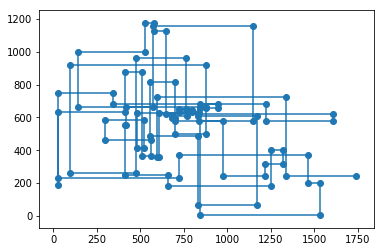

In [64]:
def random_walk(X, n_iter=100000):
    shortes_len = path_len(X)
    best_path = None
    for i in range(n_iter):
        a = np.random.randint(0, X.shape[0] - 1)
        b = np.random.randint(0, X.shape[0] - 1)
        ac, bc = copy.copy(X[a]), copy.copy(X[b])
        X[a] = bc
        X[b] = ac
        plen = path_len(X)
        if plen < shortes_len:
            shortes_len = plen
            best_path = copy.copy(X)
    print(shortes_len)
    plot_path(best_path)
    
random_walk(copy.copy(data))

13160


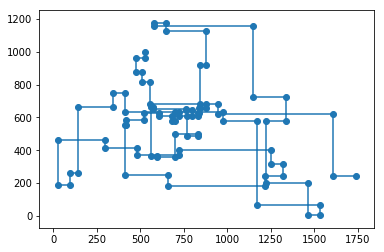

In [65]:
def hill_climb(X, n_iter=10000):
    shortes_len = path_len(X)
    best_path = None
    for i in range(n_iter):
        cur_len = path_len(X)
        point = np.random.randint(0, X.shape[0] - 1)
        swp = point
        for b in range(X.shape[0]):
            pointc, bc = copy.copy(X[point]), copy.copy(X[b])
            X[point] = bc
            X[b] = pointc
            swap_len = path_len(X)
            if swap_len < cur_len:
                swp = b
                cur_len = swap_len
            pointc, bc = copy.copy(X[point]), copy.copy(X[b])
            X[point] = bc
            X[b] = pointc
        pointc, bc = copy.copy(X[point]), copy.copy(X[swp])
        X[point] = bc
        X[swp] = pointc
    print(path_len(X))
    plot_path(X)
    
hill_climb(copy.copy(data))

12300


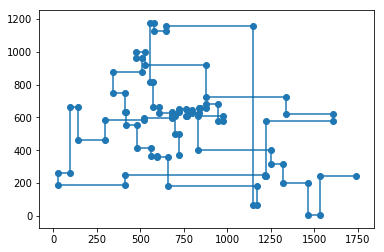

In [101]:
def simulated_annealing(X, n_iter=100000):
    shortes_len = path_len(X)
    best_path = None
    cur_len = path_len(X)
    for i in range(n_iter):
        t = 1 / (i + 1)
        a = np.random.randint(0, X.shape[0] - 1)
        b = np.random.randint(0, X.shape[0] - 1)
        ac, bc = copy.copy(X[a]), copy.copy(X[b])
        X[a] = bc
        X[b] = ac
        plen = path_len(X)
        if plen < cur_len or np.random.rand(1)[0] < np.exp(-(plen - cur_len) / t):
            cur_len = plen
            continue
        ac, bc = copy.copy(X[a]), copy.copy(X[b])
        X[a] = bc
        X[b] = ac
    print(path_len(X))
    plot_path(X)
    
simulated_annealing(copy.copy(data))

11340


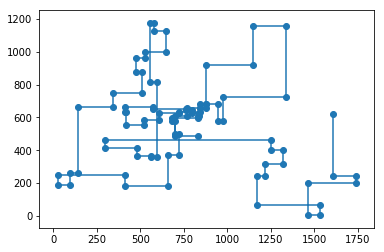

In [114]:
def cross(x, y):
    z = np.zeros_like(x)
    n = np.random.randint(x.shape[0])
    seen = set()
    for i in range(n):
        z[i] = x[i]
        seen.add(tuple(x[i]))
    ind = n
    for i in range(n, y.shape[0]):
        if tuple(y[i]) not in seen:
            z[ind] = y[i]
            ind += 1
    for i in range(n - 1, -1, -1):
        if tuple(y[i]) not in seen:
            z[ind] = y[i]
            ind += 1
    return z

def mutate(X):
    if np.random.random() < 0.2:
        a = np.random.randint(0, X.shape[0] - 1)
        b = np.random.randint(0, X.shape[0] - 1)
        ac, bc = copy.copy(X[a]), copy.copy(X[b])
        X[a] = bc
        X[b] = ac
    return X

def top(Xs, n=100):
    Xs = sorted(Xs, key=lambda x: path_len(x))
    return Xs[:n]

def genetic_alg(X, n_iter=1000):
    pop_size = 100
    Xs = [np.random.permutation(X) for _ in range(pop_size)]
    for it in range(n_iter):
        nXs = []
        for i in range(pop_size):
            for j in range(2):
                ind = np.random.randint(pop_size)
                nXs.append(mutate(cross(Xs[i], Xs[ind])))
        Xs = top(nXs, n=pop_size)
    best_path = Xs[0]
    print(path_len(best_path))
    plot_path(best_path)
    
genetic_alg(copy.copy(data))